<a href="https://colab.research.google.com/github/juhmaciel/Python/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         name  height  weight            types
0   bulbasaur       7      69  [grass, poison]
1     ivysaur      10     130  [grass, poison]
2    venusaur      20    1000  [grass, poison]
3  charmander       6      85           [fire]
4  charmeleon      11     190           [fire]


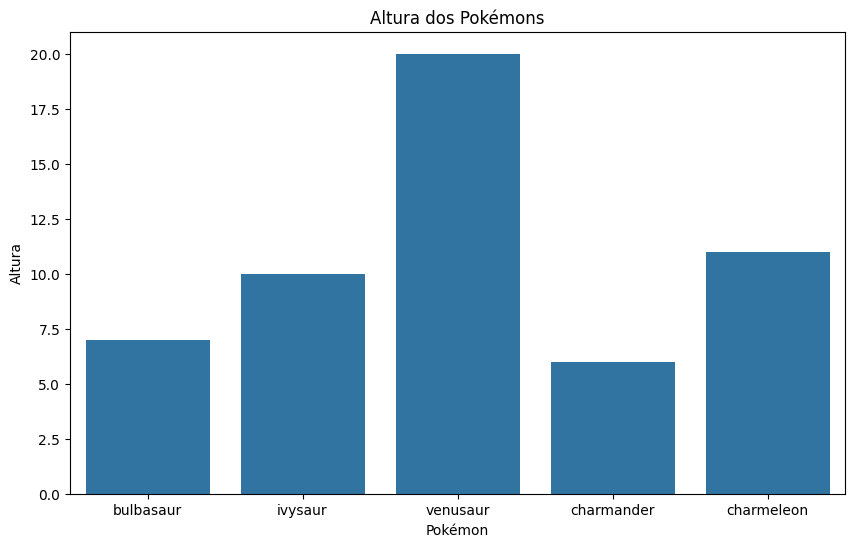

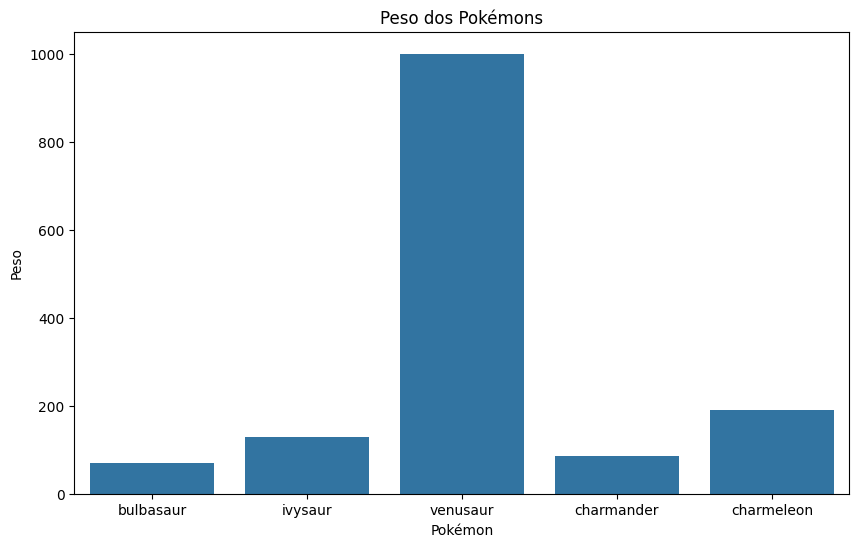

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_pokemon_data():
    url = 'https://pokeapi.co/api/v2/pokemon'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        # Extração das informações de 5 Pokémons
        pokemons = data['results'][:5]  # Pegando os primeiros 5 Pokémons da lista
        pokemon_list = []

        for pokemon in pokemons:
            name = pokemon['name']
            url = pokemon['url']
            pokemon_data = requests.get(url).json()
            height = pokemon_data['height']
            weight = pokemon_data['weight']
            types = [t['type']['name'] for t in pokemon_data['types']]

            pokemon_info = {
                'name': name,
                'height': height,
                'weight': weight,
                'types': types
            }

            pokemon_list.append(pokemon_info)

        return pokemon_list
    else:
        print(f"https://http.dog/{response.status_code}.jpg")
        return []

def create_dataframe(pokemon_list):
    df = pd.DataFrame(pokemon_list)
    return df

def visualize_data(df):
    # Gráfico de Barras: Altura dos Pokémons
    plt.figure(figsize=(10, 6))
    sns.barplot(x='name', y='height', data=df)
    plt.title('Altura dos Pokémons')
    plt.xlabel('Pokémon')
    plt.ylabel('Altura')
    plt.show()

    # Gráfico de Barras: Peso dos Pokémons
    plt.figure(figsize=(10, 6))
    sns.barplot(x='name', y='weight', data=df)
    plt.title('Peso dos Pokémons')
    plt.xlabel('Pokémon')
    plt.ylabel('Peso')
    plt.show()

def main():
    pokemon_list = extract_pokemon_data()
    df = create_dataframe(pokemon_list)
    print(df)
    visualize_data(df)

if __name__ == "__main__":
    main()
